<a href="https://colab.research.google.com/github/adi1921/CODSOFT-TASK-3/blob/main/TASK%203-%20IRIS%20FLOWER%20CLASSFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT MODULES**

In [ ]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns
import os

**LOADING THE DATASET**

In [ ]:
df=pandas.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#to display basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#to display no.of samples on each class
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**PREPROCESSING THE DATASET**

In [ ]:
#Check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

<Axes: >

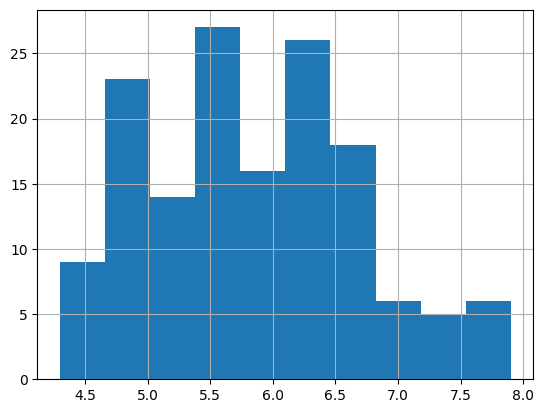

In [ ]:
df['sepal_length'].hist()

<Axes: >

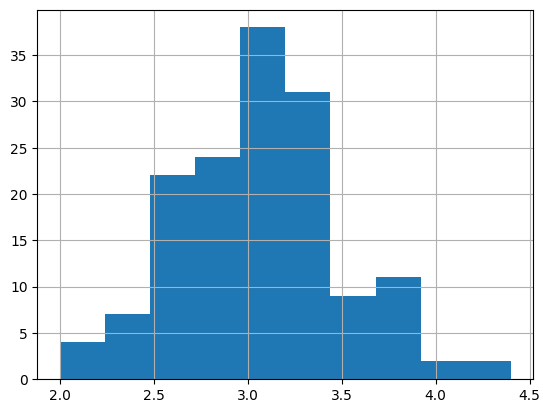

In [ ]:
df['sepal_width'].hist()

<Axes: >

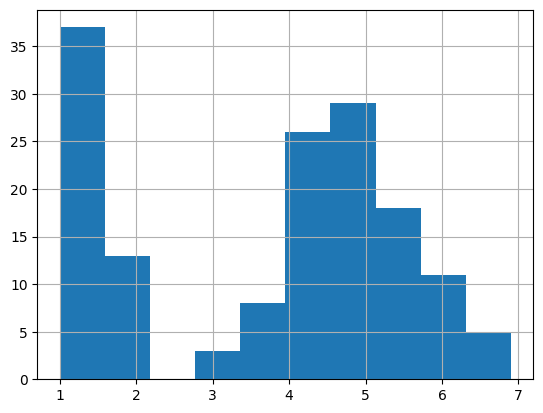

In [ ]:
df['petal_length'].hist()

<Axes: >

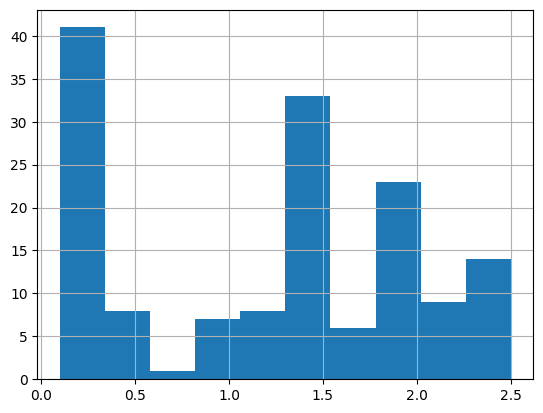

In [ ]:
df['petal_width'].hist()

In [ ]:
# scatterplot
colors=['red','orange','blue']
species=['Iris-setosa' ,'Iris-versicolor','Iris-virginica']

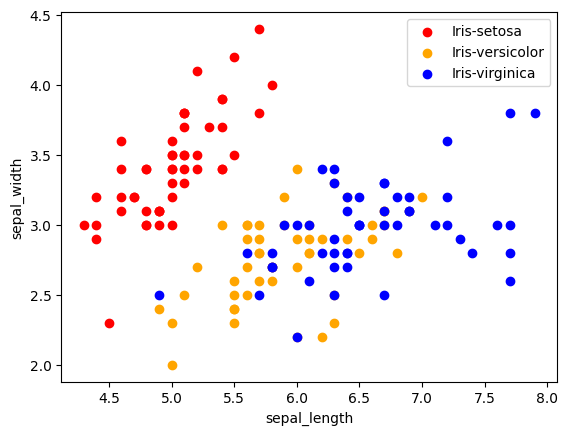

In [ ]:
for i in range(3):
  x=df[df['species']== species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
  plt.xlabel("sepal_length")
  plt.ylabel("sepal_width")
  plt.legend()

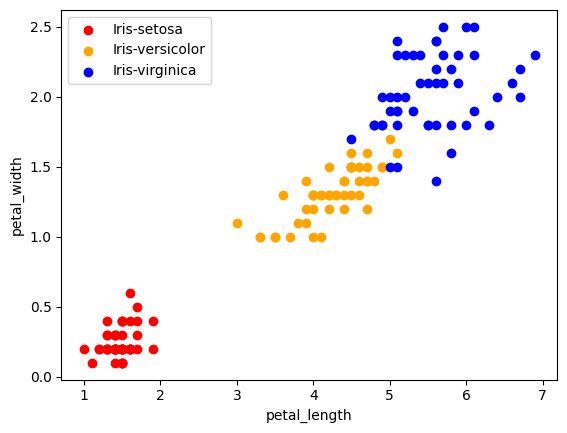

In [ ]:
for i in range(3):
  x=df[df['species']== species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel("petal_length")
  plt.ylabel("petal_width")
  plt.legend()

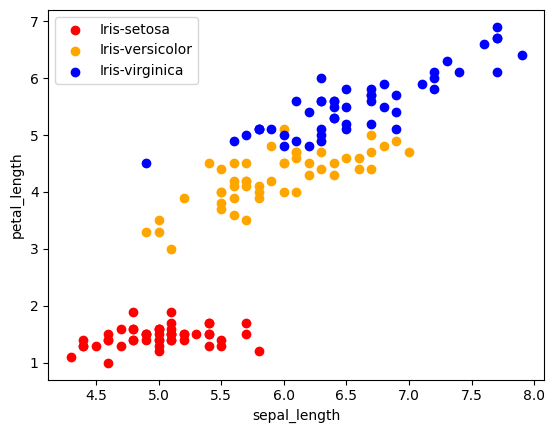

In [ ]:
for i in range(3):
  x=df[df['species']== species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
  plt.xlabel("sepal_length")
  plt.ylabel("petal_length")
  plt.legend()

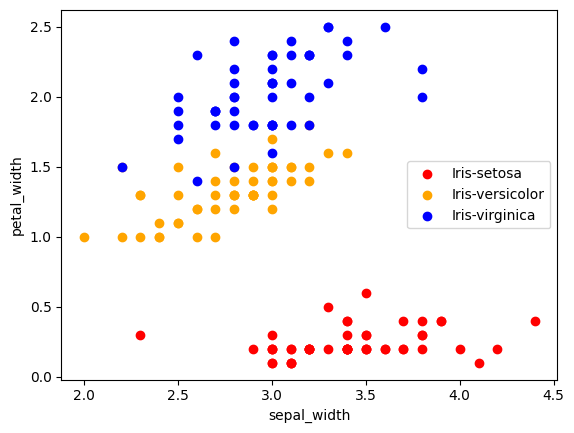

In [ ]:
for i in range(3):
  x=df[df['species']== species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel("sepal_width")
  plt.ylabel("petal_width")
  plt.legend()

**COORELATION MATRIX**

A coorelation matrix is a table showing coorelation coefficients between variables.The value is in the range of -1 and 1. If two variables have high coorelation,we can neglect one variable from those two.

In [ ]:
# Convert the 'species' column to a numerical representation
df['species'] = df['species'].astype('category').cat.codes


In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

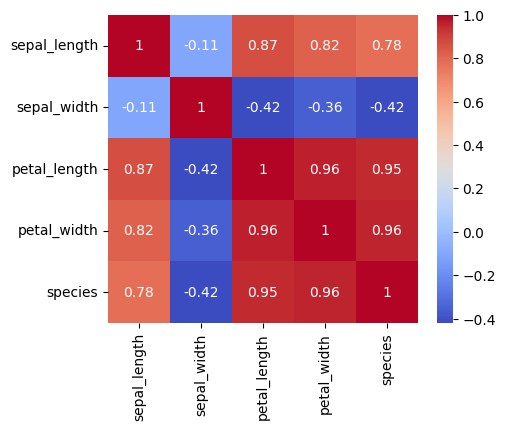

In [ ]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax= ax,cmap='coolwarm' )

**LABEL ENCODER**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**MODEL TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
x=df.drop(columns=['species'])
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [ ]:
# knn= k-Nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)


Accuracy: 93.33333333333333
